# Qubit and Qudits: Decompositions, Identities, and Noise

## Objectives:
* Understand how to decompose 1-qubit and 1-qudit gates into different gate sets
* Utilize different gate identities to transpile circuits
* Learn how gate synethesis and noise affects the accuracy of results

## Gate Identities and Decomposition

By now, you have been introduced to a number of different gates that commonly arise in quantum computing. Some of them, like the $X,Y,Z,$ and $H$ are very efficient for doing theoretical work with, but are potentially difficult to implement with real hardware. Others, like $R_X,R_Y,S$ are easier to implement on hardware, but aren't as nice for theoretical work.  Therefore it would be nice to know that regardless of what choice of gates we write our circuits in, they can be reasonably translated to a real machine. This is the purpose of <b>transpilers</b>.

Transpilers take quantum circuits written with a broad range of flexible gates, and then decomposes them using some gate set usable on the device.  One such prescription, <b>ZYZ decomposition</b> for an arbitary gate $U$ is 

$\begin{equation}
\Large
\phantom{Xxxxx}U=\begin{pmatrix} A & B\\C &D\\\end{pmatrix}=e^{i\gamma}R_Z(\lambda)R_Y(\theta)R_Z(\phi)
\end{equation}$

This prescription can be used to take any 1-qubit Unitary and decomposes it into at most 3 gates (with a global phase).  If your hardware had access to a different set of gates besides $R_X,R_Y,R_Z$, then this decomposition wouldn't necessarily help and others must be used.

Another function that most transpilers perform is to attempt to optimize the number of gates used in order to reduce noise.  For example: During decomposing a set of gates, a transpiler might come across the set of gates $H Z H$.  As you will learn, this is equivalent to a single $X$ gate.  If the hardware being used has access to the $X$ gate, the transpiler is likely to replace $HZH$ by $X$. If instead, you were to put an $X$ gate into code for use with hardware that has $H,Z$ but no $X$, the transpiler would do this replacement as part of its decomposition.

In this lab, you will undertake to "transpile" a few circuits, along the way learning some 1-qubit gate identities that are useful. As a first step, the table below defines some the gates we will consider:

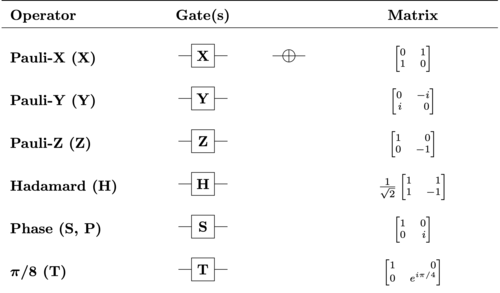

In addition to these, there is one other "gate" $\mathbb{1}=\begin{pmatrix}1 & 0\\0 & 1\end{pmatrix}$ which can be removed from any circuit, because it corresponds to leaving the qubit alone.

## 2 gate identities

For our first identities using the tables above, you should try and compute the following circuits by brute-force matrix multiplication, and see which gate in the table they correspond to:

* $X X$

* $S S$

<b>Important: When written as a circuit the gates are matrices read from left to right, but as matrices you should multiply them in reverse order i.e. $A B$ the circuit is matrix $\hat{A}\times\hat{B}$</b>

========================

Answers:

$XX$= ????????????

$SS$= ????????????

========================

Hopefully you didn't find that too painful.  For the rest of this lab, you won't be asked to do any more matrix multiplication by hand.

From your calculations, you should have found that $X X=\mathbb{1}$ and $S S=Z$. From thing, you could conclude that if these arise in a circuit, the identities can be used to reduce the gate cost (total number of gates).

In the next cell, let's introduce python code that define these matrices for us, such that we can do the matrix multiplication numerically.

In [ ]:
import numpy as np

ID = np.matrix([[1,0],[0,1]])
X = np.matrix([[0,1],[1,0]])
Y = np.matrix([[0,-1j],[1j,0]])
Z = np.matrix([[1,0],[0,-1]])
H = 1/np.sqrt(2)*np.matrix([[1,1],[1,-1]])
S = np.matrix([[1,0],[0,1j]])
T = np.matrix([[1,0],[0,np.exp(1j*np.pi/4)]])

In python, the way to multiply to matrices $A,B$ to obtain a matrix $C$ is the syntax:

    C = A @ B
    
* Use this basic syntax to check that $ZZ$, $YY$, and $HH$ all equal $\mathbb{1}$ in the next cell.

Given that all quantum gates are unitary matrices, this should interest you, because it means that $X,Y,Z,H$ are all their own inverses!

* Using the same basic syntax, can you identify what $SS$ and $TT$ are equal to?

There is one final two gate qubit identity worth I would like to mention:  $TS=ST$ (unlikely the other ones, this is perhaps more suprising.  Can you come up with a mnemonic that would make it easy?  I have one.) 

To summarize so far, we have the identities

$XX=YY=ZZ=HH=\mathbb{1}$

$SS=Z$,  $TT=S$

$TS=ST$

These usefulness in the relations is that one can string them together to simplfy much longer circuits. For example, if you were given the circuit $SXXZHHZXXT$, you could reduce it through the steps:
1. $HH=\mathbb{1}$, so $SXXZHHZXXT=SXXZZXXT$
2. $XX=ZZ=\mathbb{1}$, so $SXXZZXXT=ST=TS$

Using the identities, can you simplfy the following circuits?

====================================

$HXXH=$  ??????????

$TSTS=$  ??????????

$HSSZH=$ ??????????

====================================

## 3 gate identities

In addition to the previous identities, there are also identities that can be used in this gate set to reduce 3 gates to 1.  But they introduce some interesting new tricks.

For 3 matrices, you can multiple them in python to yield a forth matrix by:

    D = A @ B @ C
    
*Using the python syntax, and comparing to the table of gates, <b>can you identify what $HZH$ simplifies to?</b>
*Same question for <b>$HXH$</b>?

Sometimes, identities don't quite return gates in the set, but return ones that are the same up to a global phase. But we know that in the case of single qubits, global phases aren't relevant and can be ignored.  For example, as far as a single qubit is concerned $-X=X$ (when we get to multi-qubits states, these phase factors can matter)

*Using the python code, <b>can you identify what gates (up to a minus sign) $HYH$ and $XYX$ equal?</b> 

All together, you should have found a number of useful identities:

$XX=YY=ZZ=HH=\mathbb{1}$

$SS=Z$,  $TT=S$

$TS=ST$

$HXH=Z$, $HZH=X$

$HYH=XYX=(-Y)$

Using these, try and reduce the following expressions:

$HXHZ=$ ?????????

$XYXHYH=$ ??????????

$XTSTZ=$ ?????????

At this point, you feel confident and are ready for a challenge.  In order to make something that might be useful to test noise on modern hardware, its a bit of a long one.  But I believe in you!

*<b>Simplify the next cell</b>

==============================

Hank's wildly inefficient circuit:

$HYHZSTSHXHTSXYXHZH$

==============================

What did you find? Is there a substantially more efficient way to implement this circuit?

While this example may have felt artificial, this procedure is a part of the standard quantum computing toolkit.  For us, every circuit gate is expensive.  But at the same time, it can be hard to see the smartest implementation at the beginning.  For this reason, it is common to first write out any circuit that will correctly implement the desired algorithm, and only then try to optimize.  Pithily stated:

<i>Premature optimization is the root of all evil</i>

## Noise

Up until now, we have mostly emphasized the theoretical methods for performing quantum computing.  Alas, this is not the entire story.  On real machines, making and manipulating true quantum states are hard.  This is because:

* <b>Decoherence</b>: Qubits are hard to isolate from the enviroment. (Temperature, electrical noise, earthquakes all can effect you)
* <b>Gate Fidelity</b>: Gates are hard to implement exactly (You try and get a bunch of lasers, magnets, and current to flow consistently!)
* <b>Readout Error</b>: Performing measurements on qubits to extract their state at the end isn't always accurate, because measurements in reality can change the state.

The entire experimental effort to make better quantum computers is about tackling these various errors.

In the first part of this lab, we will investigate a <b>noise model</b> to see how these effects limit quantum computation, and how changing decomposition can change the error.

## Unfaithful Gates

One of the simplest noise models is to assume that every quantum gate $U$ isn't performed exactly, and instead it performs $U'=U\epsilon$ where

$\epsilon=\begin{pmatrix}\sqrt{1-e^2} & e \\ -e & \sqrt{1-e^2}\\\end{pmatrix}$

The way to think about this matrix is as analogous to adding a little bit to the identity matrix $\mathbb{1}+\epsilon$, but in a unitary way.  When $e=0$, this corresponds to $U'=U$ and you have no gate error.  When $e=1$ you have maximally bad quantum gates and you can't use your quantum computer at all.

This might all seem confusing, so lets try some examples.

First, lets define some additional gates and a state $\psi_i$

In [ ]:
import matplotlib.pyplot as plt

#Initial state of the quantum computer, A BELL STATE!
psi_i=1/np.sqrt(2)*np.array([1,1])

#U gate
U = np.matrix([[np.cos(0.1*np.pi/2),-1j*np.sin(0.1*np.pi/2)],[-1j*np.sin(0.1*np.pi/2),np.cos(0.1*np.pi/2)]])


#The epsilon gate, which models noise.  It takes in a parameter, e, which determines how bad the noise is.
def epsilon(e):
    return np.matrix([[np.sqrt(1-e**2),e],[-e,np.sqrt(1-e**2)]])

With these gates, let us try to see how a noiseless gate acting on the Bell state differs from the noisy one.  Do do this, we need to act on our state with the matrices, which can be done with the syntax:

    psi_f_clean = U @ psi_i
    psi_f_noise = U @ epsilon(e) @ psi_i    
    
Where we have defined a value of $e$.  Try $e=0.1$ and use the $U$ gate

In [ ]:
##### Set e to some value
e= ?????

#### Compute the noiseless final state psi
psi_f_clean = ?????

#### Compute the noisy final state
psi_f_noise = ?????

#Print the final state probabilities for the qubit being found in state |0> and |1>

print("Probabilities after noiseless gate:",np.power(psi_f_clean,2))

print("Probabilities after noisy gate:",np.power(psi_f_noise,2))


<b>How did the noise affect the measurement?</b>  Presumably you found that the noise took the final state away from its expect value.  This means that your ability to correctly perform quantum algorithms is limited by said noise.  Let's take this one step further.  Instead of just one gate with noise, lets try running 10 $U$ gates to compare. The syntax for this tests is:

    psi_f_clean = np.linalg.matrix_power(U,10) @ psi_i
    psi_f_clean = np.linalg.matrix_power(U @ epsilon(e),10) @ psi_i
 

In [ ]:
e=0.1

#### Compute the noiseless final state psi
psi_f_clean = ?????

#### Compute the noisy final state
psi_f_noise = ?????

#Print the final state probabilities for the qubit being found in state |0> and |1>
print("Probabilities after noiseless gate:",np.real(np.diag(np.dot(np.transpose(np.conj(psi_f_clean)),psi_f_clean))))
print("Probabilities after noisy gate:",np.real(np.diag(np.dot(np.transpose(np.conj(psi_f_noise)),psi_f_noise))))

<b>Did you notice how much worse the final state error is when we used 10 gates versus 1?</b> For a sufficiently large number of gates, your results can different so much that it is impossible to recover even approximately the right answers.

In this way, the <b>gate fidelities</b>, and noise in general, fundamentally limit the size of quantum computers and the length of the circuits we can compute.

In the previous example, the noise was the same for all gates.  Another noise model would be to suppose that the error matrix, $epsilon$ has a different value of $\epsilon$ every time.

The code for this random $\epsilon$ is:

In [ ]:
def epsilon_r():
    e = 0.25*np.random.ranf()
    return np.matrix([[np.sqrt(1-e**2),e],[-e,np.sqrt(1-e**2)]])

If you remember one of the important identities from this morning was: $HXH=Z$. Let's try modelling the effect of noise on these two different implementation of the $Z$ gate.  Using the same syntax as before, <b>compute the probabilities of getting the right results for each case.</b>

In [ ]:
#### The noiseless version of the 3 gate version HXH, of the final state without noise
psi_f_clean = ??????????????

#### Compute the 3gate version, HXH, of the final state psi with noise.  For every H or X gate
#### you need to also introduce an epsilon_r() gate
psi_f_3 = ??????????????

#### Compute  the 1 gate version, Z, of the final state psi with noise
psi_f_1 = ?????????????


#Print the final state probabilities for the qubit being found in state |0> and |1>
print("Probabilities after noiseless gate:",np.real(np.diag(np.dot(np.transpose(np.conj(psi_f_clean)),psi_f_clean))))
print("Probabilities after noisy 3-gate:",np.real(np.diag(np.dot(np.transpose(np.conj(psi_f_3)),psi_f_3))))
print("Probabilities after noisy 1-gate:",np.real(np.diag(np.dot(np.transpose(np.conj(psi_f_1)),psi_f_1))))

If probably seems difficult for you to tell which one of these implementations is better by just looking at a single run, so how about we <b>simulate a bunch of trials</b> of this, <b>make a histogram of the two implementaions</b>, and compare the widths of the histograms to judge which implementation is better!

In the histogram below, we plot the 3-gate implementation in red and the 1-gate implementiation in blue.

*<b>Which implementation has the smaller error on average?</b>

In [ ]:
g3=[]
g1=[]
for i in range(1000):
    ### Copy your noisy version of the 3gate implementation here
    psi_f_3 = ??????
    
    ### Copy your noisy version of the 3gate implementation here
    psi_f_1 = ????????????????
    
    #This will add the probability of |0> state into an array to plot!
    g3.append(np.real(np.diag(np.dot(np.transpose(np.conj(psi_f_3)),psi_f_3)))[0])
    g1.append(np.real(np.diag(np.dot(np.transpose(np.conj(psi_f_1)),psi_f_1)))[0])

plt.hist(g3, 50, density=True, facecolor='r', alpha=0.75)
plt.hist(g1, 50, density=True, facecolor='b', alpha=0.75)

# Gate Synthesis

In many cases, the particular gateset a theorist or algorithm design doesn't match the ones available on the hardware.  In this case, gate synthesis --approximately building gates out of more fundamental ones --  or transpiling --converting them to a different universal set -- may become necessary.  

This will be particularly important in the future of fault-tolerant devices, where arbitrary rotation gates may not be exactly possible, and instead must be broken down into $X,Y,Z,H,CNOT$ & $T$.  For reasons encompassed in the so-called *Eastin-Knill Theorem*, a universal gate set cannot be fully implemented fault tolerantly. As a consequence, there is at least one gate that is more expensive.  For most error-correcting codes considered today, the $T$ gate is the difficult gate.

**Consider this changes your algorithmic costs. Instead of optimizing entangling gates like $CNOT$, now you have optimize certain 1-qubit gates** 

In this section, we will consider a simple, unoptimal gate synthesis algorithm based on Solovay-Kitaeav.  It turns out that $H,T$ are a universal 1-qubit gate set, although you may need thousands of them for any given gate if you request too small an error $\epsilon$.

Step one, though, is to import the necessary librarys:

In [ ]:
from qiskit import QuantumCircuit
from qiskit.synthesis import generate_basic_approximations
from qiskit.transpiler.passes.synthesis import SolovayKitaev
from qiskit.quantum_info import Operator

In the next cell, lets defined our desired gate to synthesis. Let's investigate the $R_x(\pi/64)$.  To do this, define a circuit with only 1 qubit, and then apply the $R_x$ gate.

In [ ]:
circuit = QuantumCircuit(1)
circuit.rx(3.14159/64, 0)
#circuit.x(0)

print("Original circuit:")
print(circuit.draw())

Luckily for us, IBM has implemented the Solovay-Kitaev algorithm for gate decomposition into Qiskit.  But if behooves us to investigate it a bit before running the codes.  Following https://arxiv.org/abs/quant-ph/0505030 the pseudocode for the SK algorithm can be written recursively as

        function Solovay-Kitaev(Gate U , depth n)
        if (n == 0)
            Return Basic Approximation to U
        else
            Set U_(n-1) = Solovay-Kitaev(U , n-1)
            Set V , W = GC-Decompose(UU†_(n-1))
            Set V_(n−1) = Solovay-Kitaev(V ,n − 1)
            Set W_(n−1) = Solovay-Kitaev(W ,n − 1)
            Return U_(n) = V_(n−1)W_(n−1)V†_(n−1)W†_(n−1)U_(n−1)
            
In addition to calling itself recursively, we need a second function, called GC-Decompose,  which takes a matrix $U$ and returns two matrices $V$ and $W$ such that $VWV^\dagger W^\dagger= U$.  The Solovay-Kitaev function calls itself up to a prescribed depth $n$ which is nonlinearly related to the error $\epsilon$.  

The key to the recursive algorithm is `Return Basic Approximation to U`.  Once the algorithm reaches depth 0, any gate passed to it is matched to an existing table of "basic" approximations which have been pretabulated.

In Qiskit, one usually defines new function, which we will call `skd` as the Solovay-Kitaev Algorithm -- called by `SolovayKitaev([params])`.  For our tests, we will only consider the parameters `recursion_degree` which determines how many times to call itself before terminating and matching to the Basic Approximations.  There are other parameters, such as `basic_approximation` which can be used to define a different set.  By default, the set used by `SolovayKitaev()` is a set of $H,T$ that have been built up to depth 10.

With this `skd` we can then create a new, approximate circuit for $R_x(\pi/64)$ by calling `skd(circuit)` and defining it as a new circuit.

In [ ]:
# define skd as SolovayKitaev(recursion_degree=2)
skd = SolovayKitaev(recursion_degree=2)

#Now, we can define a new circuit called "discretized" using skd() and the preexisting "circuit"
discretized = skd(circuit)

#Because global phases are irrelevant to actual circuit implementations, the approximation from SK may
#include such a global phase.  In order to compare the approximation to the true circuit, we therefore need
#to restore this phase.  It can be obtained from "discretized" by the following code
phase = QuantumCircuit(global_phase=discretized.global_phase).to_gate()

#And the we reapply the global phase to the discretized circuit
discretized.append(phase,0)

#Here, we compute the L2-norm between "circuit" and "discretized" in order to see how well our approximation is
print("Error:", np.linalg.norm(Operator(circuit).data - Operator(discretized).data))
print("Circuit:\n", Operator(circuit).data)
print("Discretized:\n", Operator(discretized).data)

#Finally, we can print out "discretized", to see what exactly it has produced.
print("Discretized circuit:")
discretized.draw("mpl")

Notice that we needed a large number of $H$ and $T$ gates in order to approximate our desired gate to an absolute error of 0.05.  Clearly, when designing algorithms, it isn't enough to consider the gate fidelities, but that we should balance such errors with the *gate synthesis* errors that occur.  In the next cell, repeat the code used above, but instead of fixing the recursion_degree to 2, create a for-loop over `range(2,7)` and see how the gate costs change with error.

An important additional command you should include in your code is `print(discretized.count_ops())`.  This handy function reports how many of each gate you used in constructing your circuit.

In [ ]:
for i in range(2,7):
    skd = SolovayKitaev(recursion_degree=i)

    discretized = skd(circuit)

    print(discretized.count_ops())

    phase = QuantumCircuit(global_phase=discretized.global_phase).to_gate()

    discretized.append(phase,0)

    print("Discretized circuit:")
    # print(discretized.draw())

    print("Error:", np.linalg.norm(Operator(circuit).data - Operator(discretized).data))
#     print(Operator(circuit).data,"\n ",Operator(discretized).data)

## Pauli Twirling

Randomized compiling transforms coherent systematic
uncertainties associated with the imperfect fidelity of
quantum gates into stochastic systematic uncertainties
that can be quantified with a Markovian noise model. For example, suppose a $CNOT$ gate, instead of doing as expected, also added an $R_Z(\epsilon)$ phase to the target qubit.  Over repeated application of $CNOT$, we would see the quantum state driven by the error in a particular direction.  If instead, before applying the $CNOT$, we randomly rotated the state, and then after the $CNOT$ undid the random rotation, over multiple circuits and repeated $CNOT$ we would no longer coherently drift, but instead randomly.

It has seen great success in extending the circuit depth possible for quantum algorithms. At present it must be
implemented by hand, but it is expected to become a
standard part of transpilation through parametric compilation. RC utilizes multiple gates that are
equivalent in the absence of noise but that differ in the
presence of gate errors similar to our example of $X$ and $HZH$. Therefore, the averages of the results often have smaller errors than any individual circuit and the variance of the results provides a partial measure
of the size of systematic uncertainties arising from gate
errors.

A strategy for implementing randomized compiling is
“Pauli twirling”, in which a gate $\Lambda$ is replaced by a gate
including additional sets of Pauli gates $\{\sigma_i\}$ and $\{\sigma'_i\}$,
where $i$ indexes the qubits acted on by $\Lambda$, that are chosen
to satisfy

\begin{equation}
    \label{eq:paulicomp}
    \left[ \bigotimes_{i} \sigma_i  \right] \Lambda  \left[ \bigotimes_{j} \sigma_j'   \right] = \Lambda.
\end{equation}

which can pictorially be seen for the example of the $CNOT$ gate as

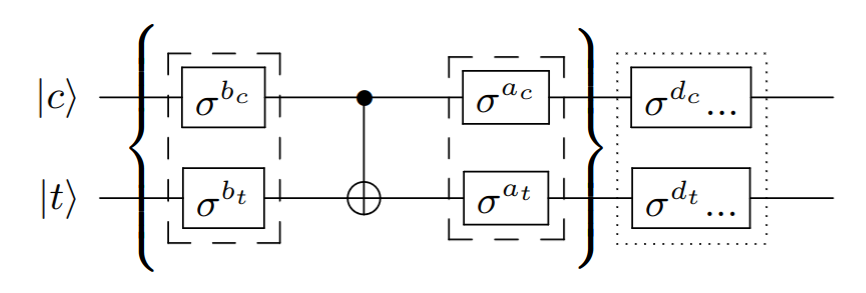

Now, you can't just put any $\sigma$ into this relation in order to preserve the relation, but instead a consistency between the gates before and after the $CNOT$ are applied is required.  Let's try and work some of these out.  To do this, we need to implement a matrix representation of CNOT.  Implement in the next cell a 2d numpy array for CNOT

\begin{equation}
CNOT = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{pmatrix}
\end{equation}

In [ ]:
CNOT = np.matrix([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])

Now, in order to apply $\mathbb{1},X,Y,Z$ to the CNOT, we need to take a tensor products of the single qubit gates e.g. $\sigma^{b_c}\otimes\sigma^{b_t}$ so that each qubit is acted on.  This can be done with

`np.kron(gate_for_qubit_1, gate_for_qubit_2)`

With this, we want to do a matrix multiplcation of $(\sigma^{b_c}\otimes\sigma^{b_t})\otimes CNOT \otimes (\sigma^{a_c}\otimes\sigma^{a_t})$, lets try this with 

\begin{align}
\sigma^{b_c}=X\\
\sigma^{b_t}=X\\
\sigma^{b_c}=X\\
\sigma^{b_t}=X\\
\end{align}

in the cell below

In [ ]:
np.kron(X,X)@CNOT@np.kron(X,X)

Does the resulting matrix match that of the original $CNOT$?

Hopefully not!  Thus we find that this choice of single qubit gates isn't suitable to Pauli Twirl with.  While you could work this out by hand, how about in the next cell we try and do some for loops to see which set of 4 gates are acceptable.

In [ ]:
gates=[ID,X,Y,Z]
gates_name=["1","X","Y","Z"]
print("bc bt ac at")
for i in range(4):
    for j in range(4):
        for k in range(4):
            for l in range(4):
                if (np.kron(gates[i],gates[j])@CNOT@np.kron(gates[k],gates[l])==CNOT).all():
                    print(gates_name[i],gates_name[j],gates_name[k],gates_name[l])

Compare your results to the table below:

\begin{array}{|cc|cc|}
     a_c & a_t & b_c & b_t\\\hline
     \mathbb{1} & \mathbb{1} & \mathbb{1} & \mathbb{1} \\
     \mathbb{1} & X & \mathbb{1} & X \\
     \mathbb{1} & Y & Z & Y \\
     \mathbb{1} & Z & Z & Z \\
     X & \mathbb{1} & X & X \\
     X & X & X & \mathbb{1} \\
     X & Y & Y & Z \\
     X & Z & Y & Y \\
     Y & \mathbb{1} & Y & X \\
     Y & X & Y & \mathbb{1} \\
     Y & Y & X & Z \\
     Y & Z & X & Y \\
     Z & \mathbb{1} & Z & \mathbb{1} \\
     Z & X & Z & X \\
     Z & Y & \mathbb{1} & Y \\
\end{array}

How have you done?  Now, you don't have to exclusively use the Pauli gates, but instead could have chosen any set of gates to try and twirl with.  Using a broader gate set will typically require more shots to be taken, but reduces potentially more coherent errors.  In the next few cells, we will work through an example implementation of Pauli Twirling.  First, we better import a few more packages.  Specifically, you should add

`from qiskit import Aer,QuantumRegister,ClassicalRegister,execute`

`from qiskit.compiler import transpile`

`from qiskit.visualization import *`

`from collections import Counter`

`from qiskit.providers.fake_provider import FakeLagosV2`

In [ ]:
from qiskit import Aer,QuantumRegister,ClassicalRegister,execute
from qiskit.compiler import transpile
from qiskit.visualization import *
from collections import Counter
from qiskit.providers.fake_provider import FakeLagosV2

In the next cells, we are going to work through the various subroutines needed in order to implement Pauli twirling for $CNOT$ gates.  First, we define a dictionary which, when called using $\sigma^{b_c}$ and $\sigma^{b_t}$, it returns the necessary $\sigma^{a_c}$ and $\sigma^{a_t}$.  This should look familiar to you from your table derived above.

In [ ]:
#Dictionary for the wrapping Pauli Matrices, with 0=ID, 1=X, 2=Y, 3=Z
TwirlCNOT = {(0, 0): (0, 0), (0, 1): (0, 1), (0, 2): (3, 2), (0, 3): (3, 3),
             (1, 0): (1, 1), (1, 1): (1, 0), (1, 2): (2, 3), (1, 3): (2, 2),
             (2, 0): (2, 1), (2, 1): (2, 0), (2, 2): (1, 3), (2, 3): (1, 2),
             (3, 0): (3, 0), (3, 1): (3, 1), (3, 2): (0, 2), (3, 3): (0, 3)}

Check your understanding by printing a few of the elements of `TwirlCNOT` in the next cell.  To call an element of the dictionary with $b_c$ and $b_t$ in order to get $a_c$ and $a_t$, call

`TwirlCNOT[(b_c,b_t)]`

In the next cell, we will define the function `get_b_gates(qc)` which takes as input the circuit, and returns a set of randomly chosen Pauli gates for all qubits in the circuit -- including the spectators.

In [ ]:
def get_b_gates(qc):
    #Produces a random set of integers between 0 and 3
    #one for each of the qubits in the circuit
    rand_set = np.random.randint(0, 4, size=qc.num_qubits)
    
    #Here, we define the set of gates we will be twirling with
    #In our case, we use 0 for the identity, and then also have X,Y,Z
    gates = [lambda x: 0, qc.x, qc.y, qc.z]
    
    #For each of the qubits in the circuit, we apply the randomly
    #chosen Pauli gate
    for i in range(qc.num_qubits):
        gates[rand_set[i]](i)
    
    #Finally, we return both the circuit, and our choice of random numbers
    #While it is obvious why we must return the circuit, we need to return
    #the rand_set in order to construct the appropriate 'a gates' e.g. a_c 
    # & a_t after the CNOT.
    return (qc, rand_set)

With the `get_b_gates` function in hand, we should next define a `get_a_gates` function which when given the appropriate $b_i$ gates can reconstruct the $a_i$ from the tables above.

To do this, we need inputs

*`qc` which defined the circuit to apply the gates to

*`cxpairs` defines the two qubits we are applying the CNOT on

*`specs` an array that defines which qubits to consider spectators

In [ ]:
def get_a_gates(qc, cxpairs, specs):
    #Here, we define the set of gates we will be twirling with
    #In our case, we use 0 for the identity, and then also have X,Y,Z
    gates = [lambda x: 0, qc.x, qc.y, qc.z]
    
    #For the target and control qubits, we need to call the TwirlCNOT
    #in order to get the appropriate a gates
    for pair in cxpairs.keys():
        c, t = pair
        comp = TwirlCNOT[cxpairs[pair]]
        gates[comp[0]](c)
        gates[comp[1]](t)
     
   #For all the spectator qubits, we only desire to have an Identity gate
    #Thus, whatever b gate we used, we merely need to apply it again.
    for spec in specs:
        qubit, gate = spec
        gates[gate](qubit)
        
    #Finally, we return the circuit
    return qc

With functions that can choose the $\sigma^b$ gates, and from them determines the $\sigma^a$ gates, we can put them together into a function `twirled_cnot(qc,v_control,v_target,vl,cor_flag)`.  This function takes in 

* The circuit `qc`

* Integers representing the control and target qubits of the CNOT, `v_control` and `v_target` respectively

* An array, `vl` listing all the qubits in the circuit

* A bool, `cor_flag`, which is used to introduce further artifical correlation because the fake devices we will use don't have sufficent value.  For a real device, this flag should be set to 0 or the code dependent on it removed


In [ ]:
def twirl_cnot(qc,v_control,v_target,vl,cor_flag):
    
    #In order to keep the transpiler from reducing our circuit, and readability
    #we impose a barrier here
    qc.barrier()
    
    #Apply the b gates
    qc, twirl_set = get_b_gates(qc)
    
    #Apply another barrier between the Twirling gates and the CNOT
    qc.barrier()
    
    #Apply the CNOT appropriately
    qc.cx(v_control, v_target)
    
    #If using a simulator, this can be used to ensure a sufficent coherent
    #error is being applied to see the effect of twirling
    if cor_flag==1:
        for i in vl:
            qc.rx(0.1*i,i)
            
    #Another barrier to prevent optimization        
    qc.barrier()
    #===========================
    
    #Determine the appropriate a gates for the control and target qubits
    cxpairs = {(v_control, v_target): (twirl_set[v_control], twirl_set[v_target])}
    
    #Determine the appropriate qubits and gates for spectators
    spectators = [(a, twirl_set[a]) for a in vl if a not in [v_control,v_target]]
    
    #Apply the a gates
    qc = get_a_gates(qc, cxpairs, spectators)
    
    #Another barrier to prevent optimization        
    qc.barrier()
    
    #Return the circuit
    return qc

In order to make comparisons between twirled and untwirled circuits, we can write one final function `my_cnot(qc,v_control,v_target,pt_flag,cor_flag)` which takes in 

* The circuit `qc`

* Integers representing the control and target qubits of the CNOT, `v_control` and `v_target` respectively

* A bool, `pt_flag`, which either applies Pauli twirling or applies the normal CNOT gate

* A bool, `cor_flag`, which is used to introduce further artifical correlation because the fake devices we will use don't have sufficent value.  For a real device, this flag should be set to 0 or the code dependent on it removed


In [ ]:
def my_cnot(qc,v_control,v_target,pt_flag,cor_flag):
    #Build an array that indexes all qubits in system
    vl=np.array(range(qc.num_qubits))
    
    #If we don't want to apply Pauli Twirling
    if pt_flag==0:
        qc.barrier()
        qc.cx(v_control,v_target)
        if cor_flag==1:
            for i in vl:
                qc.rx(0.1*i,i)
        qc.barrier()
        return qc
    #To apply Pauli Twirling
    else:
        return twirl_cnot(qc,v_control,v_target,vl,cor_flag)

With all of the subroutines done, its time to start writing our circuit for testing.  To do this, let us define a function `base_gate(circuit,qreg,creg,pt_flag,cor_flag)` which will be repeated applied.  

This function should take in a predefined circuit with 7 qubits defined outside this function as a `QuantumRegister`, 4 classical bits defined outside this function with `ClassicalRegister` and the two flags 

The gate I would like you to write is:

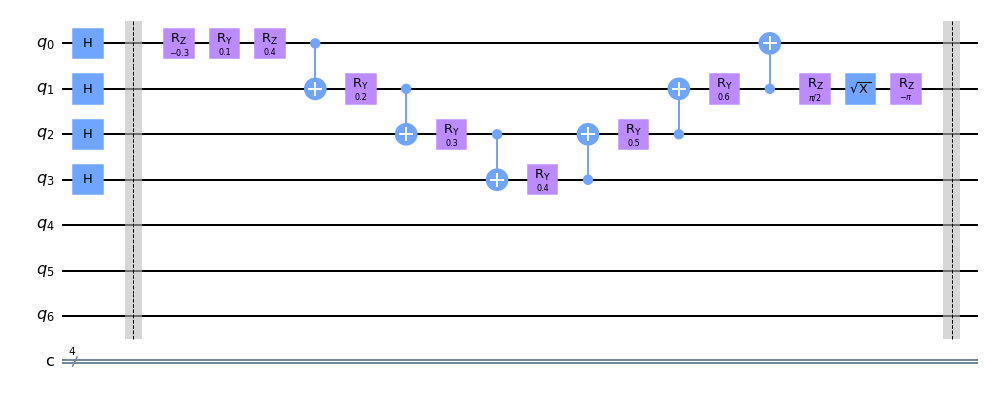

As a first step, implement the gate exactly as above using $CNOT$ gates.  Once you are confident you have properly implemented it, change all of your CNOT gates to `my_cnot`s.



In [ ]:
def base_gate(circuit,qreg,creg,pt_flag,cor_flag):
    
    for i in range(4):
        circuit.h(i)

    circuit.barrier()
    
    circuit.rz(-0.3, qreg[0])
    circuit.ry(0.1, qreg[0])
    circuit.rz(0.4, qreg[0])
    
    circuit=my_cnot(circuit,0,1,pt_flag,cor_flag)
    
    circuit.ry(0.2, qreg[1])
    
    circuit=my_cnot(circuit,1,2,pt_flag,cor_flag)
    
    circuit.ry(0.3, qreg[2])
    
    circuit=my_cnot(circuit,2,3,pt_flag,cor_flag)
    
    circuit.ry(0.4, qreg[3])
    
    circuit=my_cnot(circuit,3,2,pt_flag,cor_flag)
    
    circuit.ry(0.5, qreg[2])
    
    circuit=my_cnot(circuit,2,1,pt_flag,cor_flag)
    
    circuit.ry(0.6, qreg[1])
    
    circuit=my_cnot(circuit,1,0,pt_flag,cor_flag)

    circuit.rz(1.5707963267948966, qreg[1])
    circuit.sx(qreg[1])
    circuit.rz(-3.141592653589793, qreg[1])
    
    circuit.barrier()
    
    return circuit

In the next cell, we are ready to define the complete circuit for running.  Define a function `pt_circuit(pt_flag,cor_flag)` which only take in the two flags for running.  This function should:

* define the necessary 7 qubit quantum and 4 bit classical registers
* define the quantum circuit
* call base_gate twice
* measure the 4 active qubits
* and return the circuit

In [ ]:
def pt_circuit(pt_flag,cor_flag):
    qreg = QuantumRegister(7, 'q')
    creg = ClassicalRegister(4, 'c')
    circuit = QuantumCircuit(qreg,creg)
    
    base_gate(circuit,qreg,creg,pt_flag,cor_flag)
    base_gate(circuit,qreg,creg,pt_flag,cor_flag)
    
    for i in range(4):
        circuit.measure(qreg[i],i)
    
    return circuit

To see the effect of Pauli Twirling, we need to have a backend that will give the exact solution, and one that mocks up a real device.  

In the next cell make a noiseless backend from Aer called `backend_nl` using `Aer.get_backend("aer_simulator")`

Additionally, make a backend `backend_noise` using `FakeLagosV2()` which will use a simplified noise model of a 7 qubit device

In [ ]:
backend_nl = Aer.get_backend('aer_simulator') 
backend_noise = FakeLagosV2()

Perhaps unlike previous Qiksit circuits you have run, we would like to perform multiple, different circuits (one for each Pauli twirling) during one job.  To do this, we need to first define some empty arrays

* `circuits_nl` these will be the noiseless circuits on the Aer backend
* `circuits_wpt` These will be the pauli twirled circuits on the FakeLagosV2 backend
* `circuits_wopt` These will be the unmitigated circuits on the FakeLagosV2 backend

After this, we want to perform a for loop of size 10, and append to each of the arrays above a transpiled circuit e.g.

`circuits_nl.append(transpile(pt_circuit(0,0), backend_nl, optimization_level=1))`

Note that you need to change the flags into `pt_circuit` in order to include the correlated noise and the Pauli twirling

In [ ]:
backend_nl = Aer.get_backend('aer_simulator') 
backend_noise = FakeLagosV2()

circuits_nl = []
circuits_wpt = []
circuits_wopt = []

for i in range(10):
    circuits_nl.append(transpile(pt_circuit(0,0), backend_nl, optimization_level=1))
    circuits_wpt.append(transpile(pt_circuit(1,1), backend_noise, optimization_level=1))
    circuits_wopt.append(transpile(pt_circuit(0,1), backend_noise, optimization_level=1))

If you are curious what theses circuits look like, you can call each of them via `circuits_YOURARRAY[index_of_specific_circuit].draw('mpl')`

Now, we can just run all 3 circuit sets, and sum the results over all the different circuits

In [ ]:
job_nl = execute(circuits_nl, backend_nl, shots=8192)
job_wpt = execute(circuits_wpt, backend_noise, shots=8192)
job_wopt = execute(circuits_wopt, backend_noise, shots=8192)

counts_wpt=[job_wpt.result().get_counts()]
counts_wopt=[job_wopt.result().get_counts()]
counts_nl=[job_nl.result().get_counts()]

count_tot_nl=Counter({})
count_tot_wpt=Counter({})
count_tot_wopt=Counter({})

for i in range(len(counts_nl[0])):
    count_tot_nl+=Counter(counts_nl[0][i])
    count_tot_wopt+=Counter(counts_wopt[0][i])
    count_tot_wpt+=Counter(counts_wpt[0][i])

Finally, we can plot the results.  What do you observe?

In [ ]:
plot_histogram([count_tot_nl,count_tot_wopt,count_tot_wpt],figsize=(20, 5))

# Qudit gates: SNAP, Diplacement, and Givens Rotations

* This section is strongly adapted from https://arxiv.org/abs/2307.11900

At SQMS, we are interested in using 3d SRF cavities to build quantum computers not out of qubits, but qudits -- extension of the space of qubits $|0\rangle$ & $|1\rangle$ to larger ranges  $|0\rangle,|1\rangle,|2\rangle \cdots |d\rangle$.  In theory, a universal gate set for qudits could consist of a generalization of the $X,Y,Z,T,H$ and $CNOT$ to qudits, such that each one qubit gate needs indices for which states $k,l$ they act on the 2d subspace of, e.g. $X^{k,l},Y^{k,l},Z^{k,l}$ which are called Givens' rotations.  The CNOT then needs to be generalized into some kind of control qudit gate.

For the SQMS cavities, a potential gate set for single qudit operators that can be implemented into hardware are:

* Selective number-dependent arbitrary phase or SNAP gates: $S(\vec{\theta})=\sum_n^d e^{i \theta_n}|n\rangle\langle n|$

* Displacement gates: $D(\alpha)=e^{\alpha a^\dagger-\alpha^* a}$

With these, it is possible to construct any 1 qudit gate.  For example, a Givens rotation $G^{k,k+1}(\theta)$ can be approximated by 

$V_k(\alpha)=D(\alpha)R_{\pi}(k)D(-2\alpha)R_{\pi}(k)D(\alpha)$

where $R_{\pi}(k)$ is a special SNAP gate, $\sum_{n}^k e^{i\pi}|n\rangle\langle n|$

If we assume the Givens angle $\theta$ is small, we can series expand both $G^{k,k+1}(\theta)$ and $V_k(\alpha)$, and find that

\begin{equation}
G(\theta)=\begin{pmatrix}
\cos(\theta) & -\sin(\theta)\\
\sin(\theta) & \cos(\theta) \\
\end{pmatrix} = \begin{pmatrix}
1 & -\theta\\
\theta & 1\\ 
\end{pmatrix}+\mathcal{O}(\theta^2) 
\end{equation}

and 

\begin{equation}
V_k(\alpha)=\begin{pmatrix}
1 & -4\alpha\sqrt{k+1}\\
4\alpha\sqrt{k+1} & 1 \\
\end{pmatrix} +\mathcal{O}(\alpha^2) 
\end{equation}

Taking these expressions, for small angles can you derive a relationship between the $\alpha$ of the Displacement gate $D(\alpha)$ and the angle you desire for your Givens rotation $\theta$?

Notice, that for any $\theta$ the definition of $V_k$ provides an approximation of $G^{k,k+1}(\theta)$, but as angles get larger, we are introducing larger and larger *gate synthesis* error which for larger circuits could become a signification source of error.